<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-feracor/blob/main/A01794022_Actividad_Semanal_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

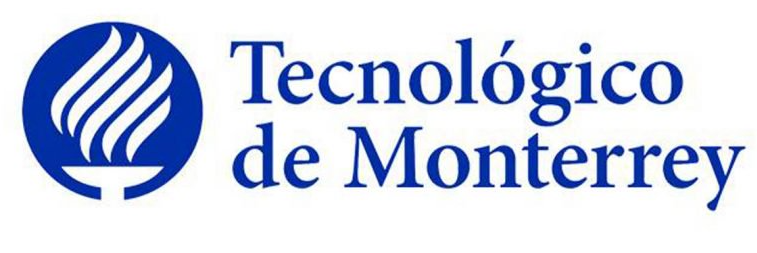

# **Ciencia y analítica de datos**
**Actividad Semanal - 11 Octubre  de 2022**

**Jobish Vallikavungal Devassia - Maricarmen Vázquez Rojí**



*   Fernando Acevedo Ortegate - A01794022   



## **Parte 1: Ejercicio guiado**



Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns

In [34]:
# Guardar dataframe, poner nombre a las columnas.

df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv', index_col=0)
df.columns = ['NT_dollar','Gender','Education ','Marital status','Age ','past_pay_Apr','past_pay_May','past_pay_Jun','past_pay_Jul','past_pay_Aug','past_pay_Sep',
              'Bill_statament_Sep','Bill_statament_Aug','Bill_statament_Jul','Bill_statament_Jun','Bill_statament_May','Bill_statament_Apr',
              'prev_payment_Sep','prev_payment_Aug','prev_payment_Jul','prev_payment_Jun','prev_payment_May','prev_payment_Apr','Y']
df.head(10)

,NT_dollar,Gender,Education,Marital status,Age,past_pay_Apr,past_pay_May,past_pay_Jun,past_pay_Jul,past_pay_Aug,...,Bill_statament_Jun,Bill_statament_May,Bill_statament_Apr,prev_payment_Sep,prev_payment_Aug,prev_payment_Jul,prev_payment_Jun,prev_payment_May,prev_payment_Apr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
6,50000,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,0.0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
7,500000,1.0,1.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
8,100000,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,0.0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
9,140000,2.0,3.0,1.0,28.0,0.0,0.0,2.0,0.0,0.0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0


In [35]:
# Ver infomacion detallada del "df"

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NT_dollar           30000 non-null  int64  
 1   Gender              29999 non-null  float64
 2   Education           29998 non-null  float64
 3   Marital status      29998 non-null  float64
 4   Age                 29995 non-null  float64
 5   past_pay_Apr        29997 non-null  float64
 6   past_pay_May        29995 non-null  float64
 7   past_pay_Jun        29993 non-null  float64
 8   past_pay_Jul        29991 non-null  float64
 9   past_pay_Aug        29984 non-null  float64
 10  past_pay_Sep        29986 non-null  float64
 11  Bill_statament_Sep  29989 non-null  float64
 12  Bill_statament_Aug  29989 non-null  float64
 13  Bill_statament_Jul  29987 non-null  float64
 14  Bill_statament_Jun  29985 non-null  float64
 15  Bill_statament_May  29983 non-null  float64
 16  Bill

In [36]:
# Visualizar las dimensiones del df

print('La cantidad de columnas es: ', df.shape[1])
print('La cantidad de filas es: ', df.shape[0])

La cantidad de columnas es:  24
La cantidad de filas es:  30000


In [37]:
# Eliminar variables cualitativas

df2 = df.drop(['Gender','Education ','Marital status','Age '], axis=1) 
df2


,NT_dollar,past_pay_Apr,past_pay_May,past_pay_Jun,past_pay_Jul,past_pay_Aug,past_pay_Sep,Bill_statament_Sep,Bill_statament_Aug,Bill_statament_Jul,Bill_statament_Jun,Bill_statament_May,Bill_statament_Apr,prev_payment_Sep,prev_payment_Aug,prev_payment_Jul,prev_payment_Jun,prev_payment_May,prev_payment_Apr,Y
ID,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [41]:
# Organizar en orden temporal

df2 = df2.reindex(columns=['NT_dollar','past_pay_Apr','past_pay_May','past_pay_Jun','past_pay_Jul','past_pay_Aug','past_pay_Sep',
    'Bill_statament_Apr','Bill_statament_May','Bill_statament_Jun','Bill_statament_Jul','Bill_statament_Aug','Bill_statament_Sep',
    'prev_payment_Apr','prev_payment_May','prev_payment_Jun','prev_payment_Jul','prev_payment_Aug','prev_payment_Sep','Y'])
df2

,NT_dollar,past_pay_Apr,past_pay_May,past_pay_Jun,past_pay_Jul,past_pay_Aug,past_pay_Sep,Bill_statament_Apr,Bill_statament_May,Bill_statament_Jun,Bill_statament_Jul,Bill_statament_Aug,Bill_statament_Sep,prev_payment_Apr,prev_payment_May,prev_payment_Jun,prev_payment_Jul,prev_payment_Aug,prev_payment_Sep,Y
ID,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,-1.0,-1.0,-2.0,-2.0,0.0,0.0,0.0,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0,1.0
2,120000,-1.0,2.0,0.0,0.0,0.0,2.0,3261.0,3455.0,3272.0,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,1.0
3,90000,0.0,0.0,0.0,0.0,0.0,0.0,15549.0,14948.0,14331.0,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,0.0
4,50000,0.0,0.0,0.0,0.0,0.0,0.0,29547.0,28959.0,28314.0,49291.0,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0,0.0
5,50000,-1.0,0.0,-1.0,0.0,0.0,0.0,19131.0,19146.0,20940.0,35835.0,5670.0,8617.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,0.0,0.0,0.0,0.0,0.0,0.0,15980.0,31237.0,88004.0,208365.0,192815.0,188948.0,1000.0,5000.0,3047.0,5003.0,20000.0,8500.0,0.0
29997,150000,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,5190.0,8979.0,3502.0,1828.0,1683.0,0.0,0.0,129.0,8998.0,3526.0,1837.0,0.0
29998,30000,4.0,3.0,2.0,-1.0,0.0,0.0,19357.0,20582.0,20878.0,2758.0,3356.0,3565.0,3100.0,2000.0,4200.0,22000.0,0.0,0.0,1.0


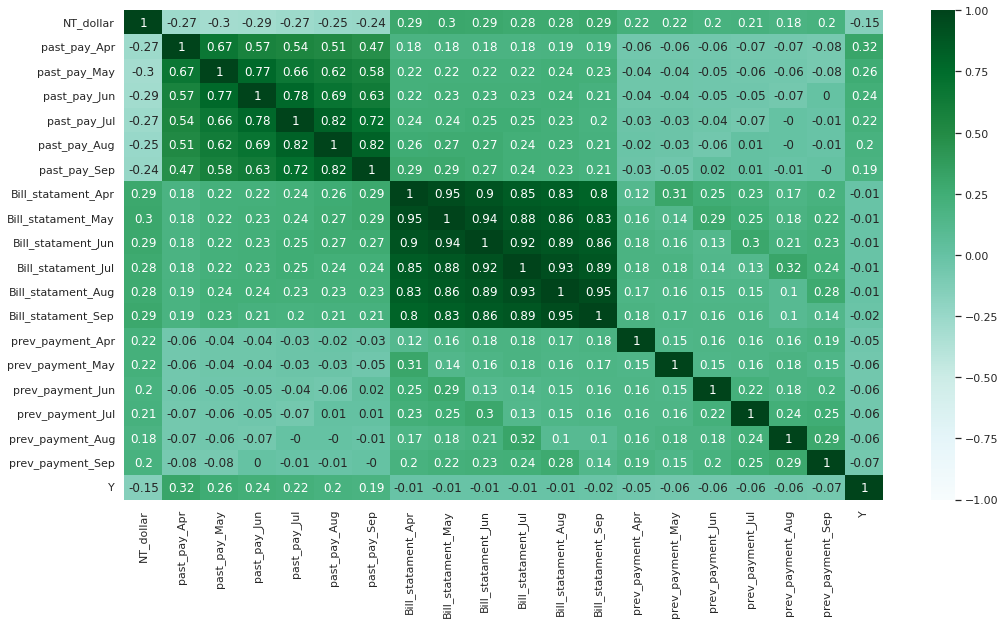

In [51]:
# Crear matriz de correlacion

sns.set(rc = {'figure.figsize':(17,9)})
sns.heatmap(df2.corr().round(2), cmap="BuGn", annot=True, vmin=-1, vmax=1) 

Paso 2: Interprete cada componente principal en términos de las variables originales

Paso 3: Identifique valores atípicos

In [ ]:
a = np.array([1,2,3,4,5])
mean(a)

# Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook



1.   **¿Cuál es el número de componentes mínimo y por qué?**
* d
---
2.   **¿Cuál es la variación de los datos que representan esos componentes?**
* d
---
3.   **¿Cuál es la pérdida de información después de realizar PCA?**
* d
---
4.   **De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**
* d
---
5.   **¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**
* d
